## Individual files

In [1]:
import os
import pandas as pd
from collections import defaultdict

# Directory containing the files
directory_path = '../program_translations'  # Replace with your directory path

# Dictionary to group data by probe

grouped_by_probe = {}
filename = 'llama_3_8b_it_rfm_python_javascript_0.5_binary_ratings.txt'
components = filename.split('_')

model = '-'.join(components[:4])
probe = components[4]
if probe=='mean':
    probe='mean_difference'
    i=5
else:
    i=4
# print(probe)
    
lang1 = components[i+1]
lang2 = components[i+2]
coef = components[i+3]

# Load the file's data
file_path = os.path.join(directory_path, filename)
with open(file_path, 'r') as f:
    text = f.read()
    ratings = text.split('--------------------------------------------------')
    try:
        ratings = [x.strip('\n') for x in ratings][:-1]
        ratings = [x[0].lower()=='y' for x in ratings]
    except:
        print("issue:", len(ratings), [x.strip('\n')[:1] for x in ratings])


In [2]:
import os
import pandas as pd
from collections import defaultdict

# Directory containing the files
directory_path = '../program_translations'  # Replace with your directory path

# Dictionary to group data by probe

grouped_by_probe = {}
filename = 'llama_3_8b_it_rfm_python_javascript_0.5_translation_ratings.txt'
components = filename.split('_')

model = '-'.join(components[:4])
probe = components[4]
if probe=='mean':
    probe='mean_difference'
    i=5
else:
    i=4
# print(probe)
    
lang1 = components[i+1]
lang2 = components[i+2]
coef = components[i+3]

# Load the file's data
file_path = os.path.join(directory_path, filename)
with open(file_path, 'r') as f:
    text = f.read()
    full_ratings = text.split('--------------------------------------------------')
    try:
        reviews = [x for x in full_ratings]
        full_ratings = [x.strip('\n') for x in full_ratings][:-1]
        full_ratings = [x[:3] for x in full_ratings]
        
    except:
        print("issue:", len(ratings), [x.strip('\n')[:1] for x in full_ratings])


In [3]:
idx_to_validate = [0, 16, 20, 23, 37, 40, 45, 48, 71, 2, 12, 74, 66, 62, 64]
sub_ratings = []
sub_full_ratings = []
for i in idx_to_validate:
    sub_ratings.append(ratings[i])
    sub_full_ratings.append(full_ratings[i])
print(sub_ratings)
print(sub_full_ratings)
i=-4
print(sub_ratings[i], sub_full_ratings[i], reviews[idx_to_validate[i]])

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
['5/5', '5/5', '5/5', '5/5', '5/5', '5/5', '5/5', '5/5', '5/5', '5/5', '5/5', '5/5', '5/5', '5/5', '5/5']
True 5/5 
5/5. The translation from Python to JavaScript is accurate and maintains the logic and structure of the original program. The use of array destructuring for swapping elements is correctly implemented, and the control flow with the `while` loop and `if-else` conditions is preserved. The variable initialization and updates are also correctly translated.



In [33]:
# ratings[7], full_ratings[7]
ratings[6], full_ratings[6]

(True, '4/5')

## Binary ratings

In [4]:
import numpy as np

In [5]:
import os
import pandas as pd
from collections import defaultdict

# Directory containing the files
directory_path = '../program_translations'  # Replace with your directory path

# Dictionary to group data by probe

grouped_by_probe = {}
for filename in os.listdir(directory_path):
    # Split the filename into components
    # print(filename)
    if 'binary' not in filename:
        continue
    components = filename.split('_')
    if len(components) >= 6:  # Ensure it matches the expected minimum pattern
        # print(components)
        # print('filename', filename)
        model = '-'.join(components[:4])
        probe = components[4]
        if probe=='mean':
            probe='mean_difference'
            i=5
        else:
            i=4
        # print(probe)
            
        lang1 = components[i+1]
        lang2 = components[i+2]
        coef = components[i+3]

        # Load the file's data
        file_path = os.path.join(directory_path, filename)
        with open(file_path, 'r') as f:
            text = f.read()
            ratings = text.split('--------------------------------------------------')
            try:
                ratings = [x.strip('\n') for x in ratings][:-1]
                ratings = [x[0].lower()=='y' for x in ratings]
            except:
                print("issue:", len(ratings), [x.strip('\n')[:1] for x in ratings])
                # print("Issue")
            # print(len(ratings))
    
        key = (model, probe, lang1, lang2)
        if key in grouped_by_probe:
            for i in range(len(ratings)):
                grouped_by_probe[key][i] = max(grouped_by_probe[key][i], ratings[i])
        else:
            grouped_by_probe[key] = ratings

# Example: Print grouped data keys
for probe, data_list in grouped_by_probe.items():
    print(f"Probe: {probe}, Number of files: {len(data_list)}")

Probe: ('gemma-2-9b-it', 'linear', 'python', 'javascript'), Number of files: 100
Probe: ('gemma-2-9b-it', 'logistic', 'python', 'javascript'), Number of files: 100
Probe: ('gemma-2-9b-it', 'mean_difference', 'python', 'javascript'), Number of files: 100
Probe: ('gemma-2-9b-it', 'pca', 'python', 'javascript'), Number of files: 100
Probe: ('gemma-2-9b-it', 'rfm', 'python', 'javascript'), Number of files: 100
Probe: ('llama-3-8b-it', 'linear', 'python', 'javascript'), Number of files: 100
Probe: ('llama-3-8b-it', 'logistic', 'python', 'javascript'), Number of files: 100
Probe: ('llama-3-8b-it', 'mean_difference', 'python', 'javascript'), Number of files: 100
Probe: ('llama-3-8b-it', 'pca', 'python', 'javascript'), Number of files: 100
Probe: ('llama-3-8b-it', 'rfm', 'python', 'javascript'), Number of files: 100


In [6]:
import pandas as pd

model = 'gemma-2-9b-it'
filtered_data = {key: values for key, values in grouped_by_probe.items() if key[0] == model}

# Prepare data for scatter plot
probes = {}
counts = {}

for (model_name, probe_type, lang1, lang2), values in filtered_data.items():
    if probe_type not in probes:
        probes[probe_type] = 0.
        counts[probe_type] = 0.
    probes[probe_type] += np.sum(values)
    counts[probe_type] += len(values)
    
for probe_type in counts.keys():
    probes[probe_type] /= counts[probe_type]

# Create a DataFrame from the key-value pairs
data = []
for keys, value in filtered_data.items():
    data.append({
        'model': keys[0],
        'method': keys[1],
        'language': keys[2],
        'value': np.mean(value),
        'std' : np.std(value)
    })

df = pd.DataFrame(data)

# Group by method and language, then calculate the average
grouped = df.groupby(['method', 'language'])['value'].mean().reset_index()

# Pivot the table for better readability
result = grouped.pivot(index='method', columns='language', values='value')

# Display the result
print(result)

# std
grouped = df.groupby(['method', 'language'])['std'].mean().reset_index()
# Pivot the table for better readability
result = grouped.pivot(index='method', columns='language', values='std')
# Display the result
print(result)

language         python
method                 
linear             0.78
logistic           0.76
mean_difference    0.04
pca                0.00
rfm                0.79
language           python
method                   
linear           0.414246
logistic         0.427083
mean_difference  0.195959
pca              0.000000
rfm              0.407308


In [7]:
model = 'llama-3-8b-it'
filtered_data = {key: values for key, values in grouped_by_probe.items() if key[0] == model}

# Prepare data for scatter plot
probes = {}
counts = {}

for (model_name, probe_type, lang1, lang2), values in filtered_data.items():
    if probe_type not in probes:
        probes[probe_type] = 0.
        counts[probe_type] = 0.
    probes[probe_type] += np.sum(values)
    counts[probe_type] += len(values)
    
for probe_type in counts.keys():
    probes[probe_type] /= counts[probe_type]

# Input data as a list of key-value pairs

# Create a DataFrame from the key-value pairs
data = []
for keys, value in filtered_data.items():
    data.append({
        'model': keys[0],
        'method': keys[1],
        'language': keys[2],
        'value': np.mean(value),
        'std' : np.std(value)
    })

df = pd.DataFrame(data)

# Group by method and language, then calculate the average
grouped = df.groupby(['method', 'language'])['value'].mean().reset_index()

# Pivot the table for better readability
result = grouped.pivot(index='method', columns='language', values='value')

# Display the result
print(result)

# std
grouped = df.groupby(['method', 'language'])['std'].mean().reset_index()
# Pivot the table for better readability
result = grouped.pivot(index='method', columns='language', values='std')
# Display the result
print(result)

language         python
method                 
linear             0.01
logistic           0.54
mean_difference    0.20
pca                0.00
rfm                0.72
language           python
method                   
linear           0.099499
logistic         0.498397
mean_difference  0.400000
pca              0.000000
rfm              0.448999


## Full ratings

In [1]:
import os
import pandas as pd
from collections import defaultdict

# Directory containing the files
directory_path = '../program_translations'  # Replace with your directory path

# Dictionary to group data by probe

grouped_by_probe = {}
for filename in os.listdir(directory_path):
    # Split the filename into components
    # print(filename)
    if 'binary' in filename:
        continue
    components = filename.split('_')
    if len(components) >= 6:  # Ensure it matches the expected minimum pattern
        # print(components)
        # print('filename', filename)
        model = '-'.join(components[:4])
        probe = components[4]
        if probe=='mean':
            probe='mean_difference'
            i=5
        else:
            i=4
        # print(probe)
            
        lang1 = components[i+1]
        lang2 = components[i+2]
        coef = components[i+3]

        # Load the file's data
        file_path = os.path.join(directory_path, filename)
        with open(file_path, 'r') as f:
            text = f.read()
            ratings = text.split('--------------------------------------------------')
            try:
                ratings = [x.strip('\n') for x in ratings][:-1]
                ratings = [int(x[0]) for x in ratings]
            except:
                print("issue:", len(ratings), [x.strip('\n')[:1] for x in ratings])
                # print("Issue")
            # print(len(ratings))
    
        key = (model, probe, lang1, lang2)
        if key in grouped_by_probe:
            for i in range(len(ratings)):
                grouped_by_probe[key][i] = max(grouped_by_probe[key][i], ratings[i])
        else:
            grouped_by_probe[key] = ratings

# Example: Print grouped data keys
for probe, data_list in grouped_by_probe.items():
    print(f"Probe: {probe}, Number of files: {len(data_list)}")


Probe: ('gemma-2-9b-it', 'linear', 'python', 'javascript'), Number of files: 100
Probe: ('gemma-2-9b-it', 'logistic', 'python', 'javascript'), Number of files: 100
Probe: ('gemma-2-9b-it', 'mean_difference', 'python', 'javascript'), Number of files: 100
Probe: ('gemma-2-9b-it', 'pca', 'python', 'javascript'), Number of files: 100
Probe: ('gemma-2-9b-it', 'rfm', 'python', 'javascript'), Number of files: 100
Probe: ('llama-3-8b-it', 'linear', 'python', 'javascript'), Number of files: 100
Probe: ('llama-3-8b-it', 'logistic', 'python', 'javascript'), Number of files: 100
Probe: ('llama-3-8b-it', 'mean_difference', 'python', 'javascript'), Number of files: 100
Probe: ('llama-3-8b-it', 'pca', 'python', 'javascript'), Number of files: 100
Probe: ('llama-3-8b-it', 'rfm', 'python', 'javascript'), Number of files: 100


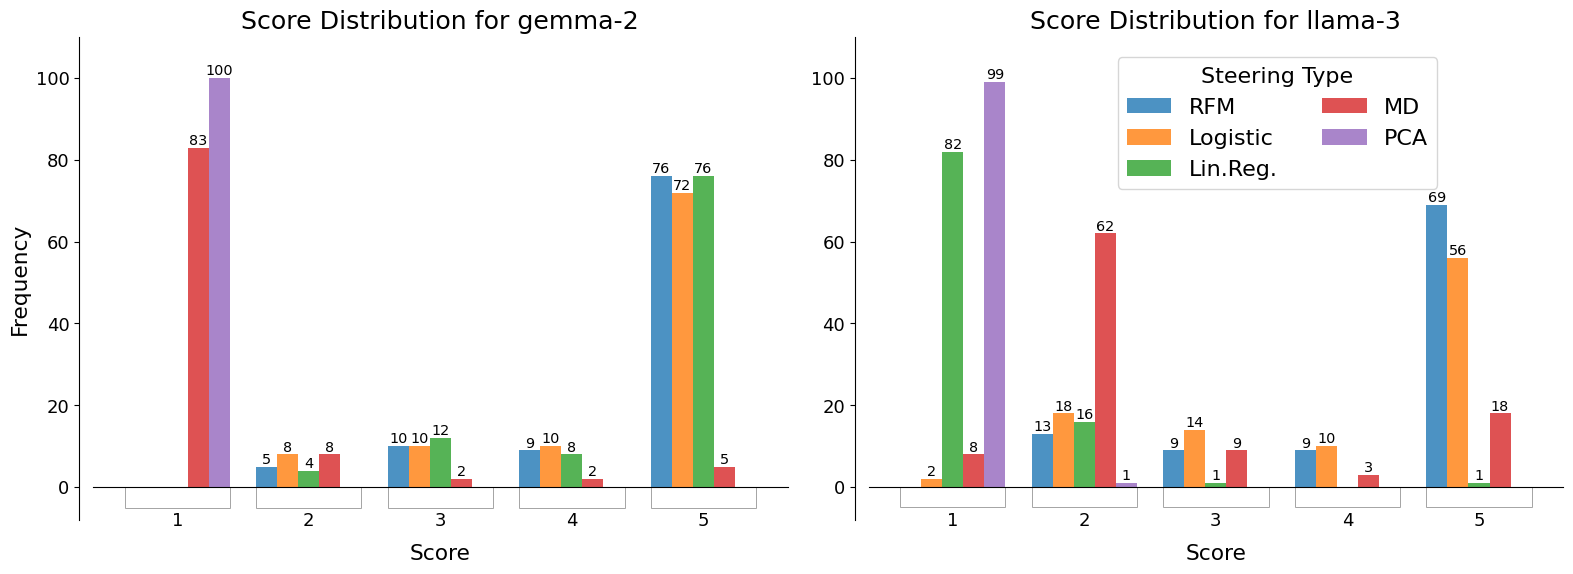

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter, defaultdict

names = {
    'rfm':'RFM',
    'linear':'Lin.Reg.',
    'logistic':'Logistic',
    'mean_difference':'MD',
    'pca':'PCA'
}

def group_and_plot_scores_by_probe(grouped_by_probe):
    # Define probe order
    probe_order = ['rfm', 'logistic', 'linear', 'mean_difference', 'pca']
    
    # First, group scores by model type and probe
    model_probe_scores = defaultdict(lambda: defaultdict(list))
    
    for (model, probe, *_), scores in grouped_by_probe.items():
        model_type = '-'.join(model.split('-')[:2])
        model_probe_scores[model_type][probe].extend(scores)
    
    # Reduce bar width for more compact layout
    bar_width = 0.08  # Reduced from 0.12
    
    # Increase default font sizes
    plt.rcParams.update({'font.size': 12 * 1.3})
    
    # Create single figure with two subplots - reduced width
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # Reduced from 24 to 16
    
    # Track maximum height across all subplots for consistent scaling
    global_max_height = 0
    
    # Plot each model type in its own subplot
    for idx, (model_type, probe_scores) in enumerate(model_probe_scores.items()):
        ax = axs[idx]
        
        # Calculate positions for each group of bars - reduced spacing
        x = np.arange(1, 6) * 0.5  # Reduced from 0.8 to 0.5
        
        # Plot bars for each probe
        max_height = 0
        for i, probe in enumerate(probe_order):
            if probe in probe_scores:
                score_counts = Counter(probe_scores[probe])
                heights = [score_counts.get(score, 0) for score in range(1, 6)]
                bar_positions = x + (i - len(probe_order)/2 + 0.5) * bar_width
                
                bars = ax.bar(bar_positions, heights, bar_width,
                            label=names[probe], alpha=0.8)
                
                max_height = max(max_height, max(heights) if heights else 0)
                global_max_height = max(global_max_height, max_height)
                
                # Add value labels
                for bar in bars:
                    height = bar.get_height()
                    if height > 0:
                        ax.text(bar.get_x() + bar.get_width()/2., height,
                               f'{int(height)}',
                               ha='center', va='bottom',
                               fontsize=8 * 1.3)
        
        # Add vertical and horizontal lines for group boundaries
        y_min = -max_height * 0.05
        
        for x_pos in x:
            group_left = x_pos - (len(probe_order)/2) * bar_width
            group_right = x_pos + (len(probe_order)/2) * bar_width
            
            # Draw vertical lines below x-axis
            ax.vlines(x=[group_left, group_right], ymin=y_min, ymax=0,
                     colors='gray', linestyles='solid', linewidth=0.5)
            
            # Draw horizontal line connecting the verticals
            ax.hlines(y=y_min, xmin=group_left, xmax=group_right,
                     colors='gray', linestyles='solid', linewidth=0.5)
            
            # Add score labels
            ax.text(x_pos, y_min * 1.2, str(int(x_pos/0.5)),  # Updated divisor to match new spacing
                   ha='center', va='top', fontsize=10 * 1.3)
        
        # Customize subplot
        ax.set_title(f'Score Distribution for {model_type}', fontsize=14 * 1.3)
        ax.set_xlabel('Score', fontsize=12 * 1.3)
        if idx == 0:
            ax.set_ylabel('Frequency', fontsize=12 * 1.3)
        
        # Remove x-axis ticks
        ax.set_xticks([])
        
        # Move the x-axis to y=0
        ax.spines['bottom'].set_position(('data', 0))
        
        # Adjust other spines
        ax.spines['left'].set_position(('outward', 10))
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        # Move x-axis label below the boundary lines
        ax.xaxis.set_label_coords(0.5, -0.05)
        
        # Increase tick label font sizes
        ax.tick_params(axis='both', which='major', labelsize=10 * 1.3)
    
    # After plotting all subplots, set consistent y-axis limits
    for ax in axs:
        ax.set_ylim(bottom=-global_max_height * 0.08, top=global_max_height * 1.1)
    
    # Add single legend for the entire figure
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, 
              title='Steering Type',
              loc='upper left',
              bbox_to_anchor=(0.7, 0.9),
              ncol=len(probe_order)//2,
              fontsize=8 * 2.0,
              title_fontsize=10 * 1.6)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save plot
    plt.savefig('score_distributions_combined.pdf', 
                format='pdf', 
                bbox_inches='tight',
                dpi=300)
    plt.show()
    plt.close()

# Usage
group_and_plot_scores_by_probe(grouped_by_probe)

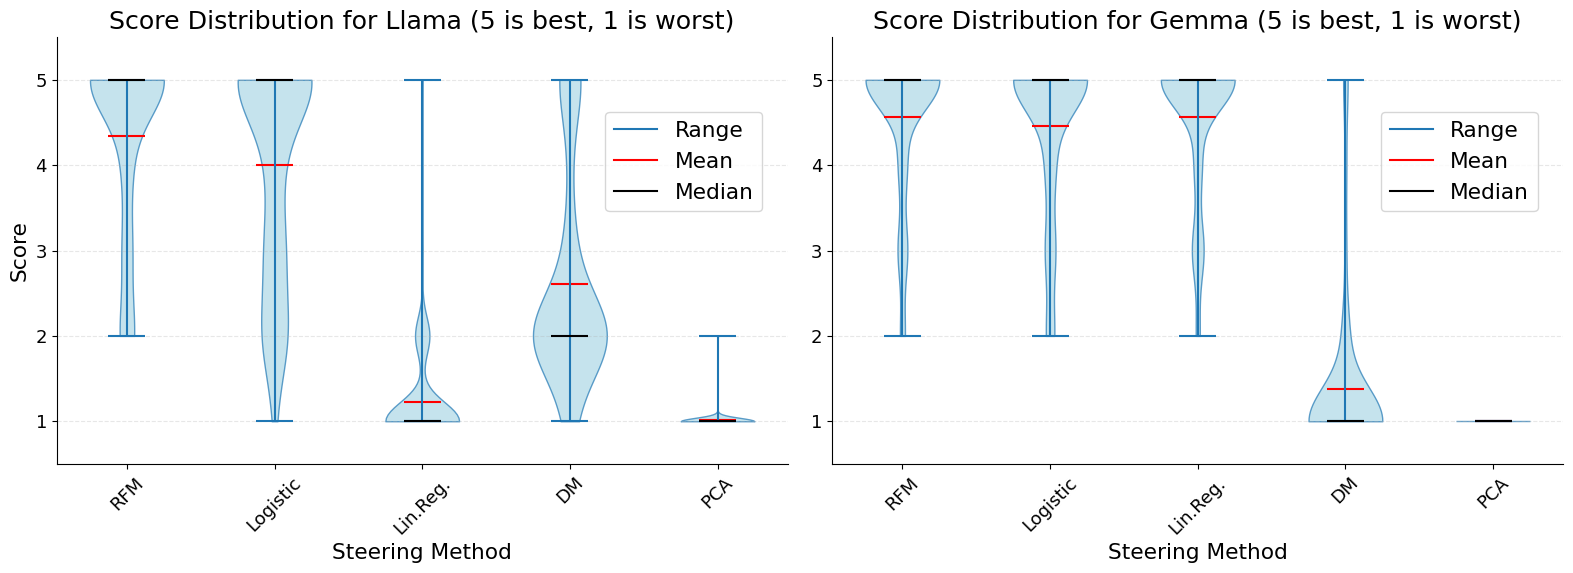

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter, defaultdict
from matplotlib.lines import Line2D

names = {
    'rfm':'RFM',
    'linear':'Lin.Reg.',
    'logistic':'Logistic',
    'mean_difference':'DM',
    'pca':'PCA'
}

def group_and_plot_scores_by_probe(grouped_by_probe):
    # Define probe order
    probe_order = ['rfm', 'logistic', 'linear', 'mean_difference', 'pca']
    
    # First, group scores by model type and probe
    model_probe_scores = defaultdict(lambda: defaultdict(list))
    
    for (model, probe, *_), scores in grouped_by_probe.items():
        model_type = '-'.join(model.split('-')[:2])
        model_probe_scores[model_type][probe].extend(scores)
    
    # Increase default font sizes
    plt.rcParams.update({'font.size': 12 * 1.3})
    
    # Create single figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    
    # Define violin color and alpha
    violin_color = 'lightblue'
    violin_alpha = 0.7
    violin_edge_color = '#1f77b4'  # This is the default matplotlib blue color used for the violin plot edges
    
    # Plot each model type in its own subplot
    model_types = list(model_probe_scores.keys())
    model_types = reversed(sorted(model_types))
    for idx, model_type in enumerate(model_types):
        ax = axs[idx]
        probe_scores = model_probe_scores[model_type]
        
        # Prepare data for violin plots
        violin_data = []
        positions = []
        labels = []
        
        for i, probe in enumerate(probe_order):
            if probe in probe_scores:
                violin_data.append(probe_scores[probe])
                positions.append(i)
                labels.append(names[probe])
        
        # Create violin plot
        parts = ax.violinplot(violin_data, positions=positions,
                            showmeans=True, showmedians=True)
        
        # Customize violin appearance
        for pc in parts['bodies']:
            pc.set_facecolor(violin_color)
            pc.set_alpha(violin_alpha)
            pc.set_edgecolor(violin_edge_color)
        
        # Customize mean and median lines
        parts['cmeans'].set_color('red')
        parts['cmedians'].set_color('black')
        
        # Set y-axis limits to match data range with some padding
        ax.set_ylim(0.5, 5.5)
        
        # Set custom y-ticks for scores
        ax.set_yticks(range(1, 6))
        
        # Set probe labels
        ax.set_xticks(positions)
        ax.set_xticklabels(labels, rotation=45)
        
        # Customize subplot
        if model_type=='gemma-2':
            model_name = 'Gemma'
        elif model_type=='llama-3':
            model_name = 'Llama'
        ax.set_title(f'Score Distribution for {model_name} (5 is best, 1 is worst)', fontsize=14 * 1.3)
        ax.set_xlabel('Steering Method', fontsize=12 * 1.3)
        if idx == 0:
            ax.set_ylabel('Score', fontsize=12 * 1.3)
        
        # Add grid for better readability
        ax.grid(True, axis='y', linestyle='--', alpha=0.3)
        
        # Remove top and right spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        # Increase tick label font sizes
        ax.tick_params(axis='both', which='major', labelsize=10 * 1.3)
        
        legend_elements = [
            Line2D([0], [0], color=violin_edge_color, label='Range'),
            Line2D([0], [0], color='red', label='Mean'),
            Line2D([0], [0], color='black', label='Median')
        ]
        ax.legend(handles=legend_elements, 
              loc='upper right',
              bbox_to_anchor=(0.98, 0.85),
              fancybox=True,
              facecolor='white',
              )
    
    # Create legend elements with matching colors
    # legend_elements = [
    #     Line2D([0], [0], color=violin_edge_color, label='Range'),
    #     Line2D([0], [0], color='red', label='Mean'),
    #     Line2D([0], [0], color='black', label='Median')
    # ]
    # fig.legend(handles=legend_elements, 
    #           loc='upper right',
    #           bbox_to_anchor=(0.98, 0.85),
    #           fancybox=True,
    #           facecolor='white',
    #           )
    
    # Adjust layout
    plt.tight_layout()
    
    # Save plot
    plt.savefig('score_distributions_violin.pdf', 
                format='pdf', 
                bbox_inches='tight',
                dpi=300)
    plt.show()
    plt.close()

# Usage
group_and_plot_scores_by_probe(grouped_by_probe)

In [4]:
import pandas as pd

model = 'gemma-2-9b-it'
filtered_data = {key: values for key, values in grouped_by_probe.items() if key[0] == model}

# Prepare data for scatter plot
probes = {}
counts = {}

for (model_name, probe_type, lang1, lang2), values in filtered_data.items():
    if probe_type not in probes:
        probes[probe_type] = 0.
        counts[probe_type] = 0.
    probes[probe_type] += np.sum(values)
    counts[probe_type] += len(values)
    
for probe_type in counts.keys():
    probes[probe_type] /= counts[probe_type]

# Create a DataFrame from the key-value pairs
data = []
for keys, value in filtered_data.items():
    data.append({
        'model': keys[0],
        'method': keys[1],
        'language': keys[2],
        'value': np.mean(value),
        'std' : np.std(value)
    })

df = pd.DataFrame(data)

# Group by method and language, then calculate the average
grouped = df.groupby(['method', 'language'])['value'].mean().reset_index()

# Pivot the table for better readability
result = grouped.pivot(index='method', columns='language', values='value')

# Display the result
print(result)

# std
grouped = df.groupby(['method', 'language'])['std'].mean().reset_index()
# Pivot the table for better readability
result = grouped.pivot(index='method', columns='language', values='std')
# Display the result
print(result)

language         python
method                 
linear             4.56
logistic           4.46
mean_difference    1.38
pca                1.00
rfm                4.56
language           python
method                   
linear           0.852291
logistic         0.963535
mean_difference  0.997798
pca              0.000000
rfm              0.863944


In [5]:
model = 'llama-3-8b-it'
filtered_data = {key: values for key, values in grouped_by_probe.items() if key[0] == model}

# Prepare data for scatter plot
probes = {}
counts = {}

for (model_name, probe_type, lang1, lang2), values in filtered_data.items():
    if probe_type not in probes:
        probes[probe_type] = 0.
        counts[probe_type] = 0.
    probes[probe_type] += np.sum(values)
    counts[probe_type] += len(values)
    
for probe_type in counts.keys():
    probes[probe_type] /= counts[probe_type]

# Input data as a list of key-value pairs

# Create a DataFrame from the key-value pairs
data = []
for keys, value in filtered_data.items():
    data.append({
        'model': keys[0],
        'method': keys[1],
        'language': keys[2],
        'value': np.mean(value),
        'std' : np.std(value)
    })

df = pd.DataFrame(data)

# Group by method and language, then calculate the average
grouped = df.groupby(['method', 'language'])['value'].mean().reset_index()

# Pivot the table for better readability
result = grouped.pivot(index='method', columns='language', values='value')

# Display the result
print(result)

# std
grouped = df.groupby(['method', 'language'])['std'].mean().reset_index()
# Pivot the table for better readability
result = grouped.pivot(index='method', columns='language', values='std')
# Display the result
print(result)

language         python
method                 
linear             1.22
logistic           4.00
mean_difference    2.61
pca                1.01
rfm                4.34
language           python
method                   
linear           0.558211
logistic         1.264911
mean_difference  1.240121
pca              0.099499
rfm              1.088301
